In [6]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from joblib import load
import pickle
import warnings
from sklearn.exceptions import InconsistentVersionWarning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

In [7]:
# data = np.load('../../Data/#1/processed_data.npz')
# x_tr_resample = data['x_tr_resample']
# y_tr_resample = data['y_tr_resample']
# X_test = data['X_test']
# y_test = data['y_test']
# X_train = data['X_train']

# with open('../../Data/#1/power_transformer.pkl', 'rb') as f:
#     norm = pickle.load(f)

x_tr_resample = pd.read_csv('../../Data/sequential/n=7/X_train_smote.csv')
y_tr_resample = pd.read_csv('../../Data/sequential/n=7/y_train_smote.csv')
X_test = pd.read_csv('../../Data/sequential/n=7/X_test.csv')
y_test = pd.read_csv('../../Data/sequential/n=7/y_test.csv')

# norm = load('../../Data/#1/power_transformer.joblib')


# norm_train_feature = norm.fit_transform(X_train)
# norm_test_feature = norm.transform(X_test)

In [8]:
model = CatBoostClassifier(random_seed=42)

In [9]:
model.fit(
    x_tr_resample, 
    y_tr_resample, 
    eval_set=(X_test, y_test),
    early_stopping_rounds=500
)

Learning rate set to 0.058829
0:	learn: 0.5192509	test: 0.5177088	best: 0.5177088 (0)	total: 15.8ms	remaining: 15.8s
1:	learn: 0.3961771	test: 0.3899034	best: 0.3899034 (1)	total: 29.6ms	remaining: 14.8s
2:	learn: 0.3305912	test: 0.3362165	best: 0.3362165 (2)	total: 45ms	remaining: 15s
3:	learn: 0.2781119	test: 0.2902626	best: 0.2902626 (3)	total: 60.3ms	remaining: 15s
4:	learn: 0.2196537	test: 0.2255855	best: 0.2255855 (4)	total: 76.9ms	remaining: 15.3s
5:	learn: 0.1749197	test: 0.1776952	best: 0.1776952 (5)	total: 86ms	remaining: 14.2s
6:	learn: 0.1508806	test: 0.1579684	best: 0.1579684 (6)	total: 101ms	remaining: 14.3s
7:	learn: 0.1264573	test: 0.1311908	best: 0.1311908 (7)	total: 113ms	remaining: 14.1s
8:	learn: 0.1125301	test: 0.1184217	best: 0.1184217 (8)	total: 123ms	remaining: 13.6s
9:	learn: 0.1023683	test: 0.1083902	best: 0.1083902 (9)	total: 132ms	remaining: 13s
10:	learn: 0.0882051	test: 0.0918545	best: 0.0918545 (10)	total: 140ms	remaining: 12.6s
11:	learn: 0.0783100	test:

Accuracy: 99.14%
Precision: 98.58%
Recall: 97.42%
F1 Score: 98.00%


<Axes: >

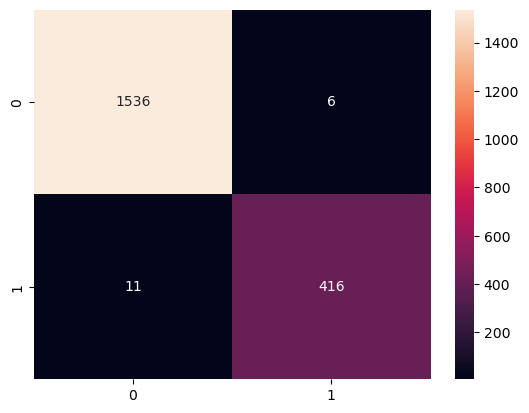

In [10]:
y_pred = model.predict(X_test)

# Cetak metrik performa
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

sns.heatmap(conf_matrix, annot=True, fmt='d')